## Vamos a extrer la información de los diferentes datasets de amazon 

In [1]:
import json
import pandas as pd
from glob import glob

def convert(x):
    ''' Convert a json string to a flat python dictionary
    which can be passed into Pandas. '''
    ob = json.loads(x)
    for k, v in ob.items():
        if isinstance(v, list):
            ob[k] = ','.join(str(v))
        elif isinstance(v, dict):
            for kk, vv in v.items():
                ob['%s_%s' % (k, kk)] = vv
            del ob[k]
    return ob

for json_filename in glob('*.json'):
    csv_filename = '%s.csv' % json_filename[:-5]
    print 'Converting %s to %s' % (json_filename, csv_filename)
    df = pd.DataFrame([convert(line) for line in file(json_filename)])
    df.to_csv(csv_filename, encoding='utf-8', index=False)

Converting reviews_Amazon_Instant_Video_5.json to reviews_Amazon_Instant_Video_5.csv


<Container object of 5 artists>

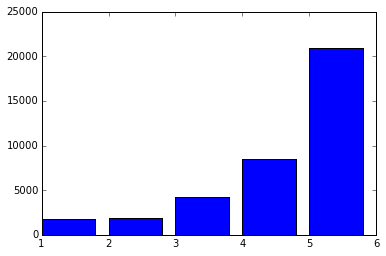

In [5]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
overallDF = df[["overall","reviewText"]]

data = df.groupby("overall")["overall"].count()
plt.bar(data.index.values,data.values)

pandas.core.categorical.Categorical

In [36]:
# Hay que igualar y coger muestras de tamaño similar para todas las valoraciones?

## 2.-  Procesamiento de texto sobre las reviews
Eliminamos stopwords (TF-idf)
aplicamos métodos de lematizacion - TextBlob, NLTK
extraemos entidades (tokens)

## 3.- Extracción de muestras de test y de entrenamiento para el modelo
## 4.- Entrenamiento del modelo a partir de los datos de test.
## 5.- Ejecución del modelo. Evaluación de resultados, comparación con otros modelos Sentiment Analysis.

In [25]:
from textblob import TextBlob
from textblob import Word


In [23]:
import nltk
# nltk.download() hay que hacerlo la primera vez para cargar todos los corpus necesarios
#nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [26]:
TextBlob(overallDF["reviewText"][1]).words.lemmatize()


WordList([u'I', u'highly', u'recommend', u'this', u'series', u'It', u'is', u'a', u'must', u'for', u'anyone', u'who', u'is', u'yearning', u'to', u'watch', u'grown', u'up', u'television', u'Complex', u'character', u'and', u'plot', u'to', u'keep', u'one', u'totally', u'involved', u'Thank', u'you', u'Amazin', u'Prime'])

## funcion que elimina las stopwords y aplica lematizacion

In [21]:
from nltk.corpus import stopwords

cachedStopWords = stopwords.words("english")
cachedStopWords


[u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u'your',
 u'yours',
 u'yourself',
 u'yourselves',
 u'he',
 u'him',
 u'his',
 u'himself',
 u'she',
 u'her',
 u'hers',
 u'herself',
 u'it',
 u'its',
 u'itself',
 u'they',
 u'them',
 u'their',
 u'theirs',
 u'themselves',
 u'what',
 u'which',
 u'who',
 u'whom',
 u'this',
 u'that',
 u'these',
 u'those',
 u'am',
 u'is',
 u'are',
 u'was',
 u'were',
 u'be',
 u'been',
 u'being',
 u'have',
 u'has',
 u'had',
 u'having',
 u'do',
 u'does',
 u'did',
 u'doing',
 u'a',
 u'an',
 u'the',
 u'and',
 u'but',
 u'if',
 u'or',
 u'because',
 u'as',
 u'until',
 u'while',
 u'of',
 u'at',
 u'by',
 u'for',
 u'with',
 u'about',
 u'against',
 u'between',
 u'into',
 u'through',
 u'during',
 u'before',
 u'after',
 u'above',
 u'below',
 u'to',
 u'from',
 u'up',
 u'down',
 u'in',
 u'out',
 u'on',
 u'off',
 u'over',
 u'under',
 u'again',
 u'further',
 u'then',
 u'once',
 u'here',
 u'there',
 u'when',
 u'where',
 u'why',
 u'how',
 u'all

In [14]:
def lemmatizeReviewText(row):
    words = TextBlob(row["reviewText"]).words.lemmatize()
    ext = ' '.join(word for word in words if word not in (cachedStopWords))
    return ext



In [22]:
overallDF['reviewTextLemmatized']=overallDF.apply(lemmatizeReviewText,axis=1)

NameError: ("global name 'TextBlob' is not defined", u'occurred at index 0')

In [27]:
overallDFsample=overallDF[1:5]
overallDFsample['reviewTextLemmatized']=overallDFsample.apply(lemmatizeReviewText,axis=1)
type (words)

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


NameError: name 'words' is not defined

In [28]:
overallDFsample

,overall,reviewText,reviewTextLemmatized
1,5,I highly recommend this series. It is a must f...,I highly recommend series It must anyone yearn...
2,1,This one is a real snoozer. Don't believe anyt...,This one real snoozer Do n't believe anything ...
3,4,Mysteries are interesting. The tension betwee...,Mysteries interesting The tension Robson tall ...
4,5,"This show always is excellent, as far as briti...",This show always excellent far british crime m...
